In [4]:
import pandas as pd

df_product = pd.read_csv("data_produk.csv")
df_transaction = pd.read_csv("transaksi_toko.csv")

In [5]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   5 non-null      int64 
 1   nama_produk  5 non-null      object
 2   kategori     5 non-null      object
 3   harga        5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [6]:
df_product

,product_id,nama_produk,kategori,harga
0,101,Kopi Susu,Minuman,15000
1,102,Latte,Minuman,20000
2,103,Espresso,Minuman,18000
3,104,Tea,Minuman,10000
4,105,Mineral Water,Air,5000


In [7]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_transaksi  20 non-null     int64  
 1   tanggal       20 non-null     object 
 2   product_id    20 non-null     int64  
 3   jumlah_beli   19 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes


In [8]:
df_transaction

,id_transaksi,tanggal,product_id,jumlah_beli
0,1,2025-01-01,101,2.0
1,2,2025-01-02,102,1.0
2,3,2025-01-03,101,5.0
3,4,2025-01-03,105,2.0
4,5,2025-01-01,103,1.0
5,6,2025-01-02,101,NaN
6,7,2025-01-02,104,1.0
7,8,2025-01-01,102,3.0
8,9,2025-01-03,101,1.0
9,10,2025-01-02,999,10.0


In [9]:
df_all = df_transaction.merge(df_product, how="inner", on="product_id")

In [10]:
df_all['jumlah_beli'] = df_all['jumlah_beli'].fillna(df_all['jumlah_beli'].mode()[0])

In [11]:
df_all

,id_transaksi,tanggal,product_id,jumlah_beli,nama_produk,kategori,harga
0,1,2025-01-01,101,2.0,Kopi Susu,Minuman,15000
1,2,2025-01-02,102,1.0,Latte,Minuman,20000
2,3,2025-01-03,101,5.0,Kopi Susu,Minuman,15000
3,4,2025-01-03,105,2.0,Mineral Water,Air,5000
4,5,2025-01-01,103,1.0,Espresso,Minuman,18000
5,6,2025-01-02,101,1.0,Kopi Susu,Minuman,15000
6,7,2025-01-02,104,1.0,Tea,Minuman,10000
7,8,2025-01-01,102,3.0,Latte,Minuman,20000
8,9,2025-01-03,101,1.0,Kopi Susu,Minuman,15000
9,11,2025-01-02,103,2.0,Espresso,Minuman,18000


In [12]:
df_all['total_bayar'] = df_all['jumlah_beli'] * df_all['harga']

In [13]:
df_all.groupby('nama_produk').sum()['jumlah_beli'].sort_values(ascending=False)

nama_produk
Kopi Susu        16.0
Mineral Water     7.0
Latte             7.0
Espresso          4.0
Tea               2.0
Name: jumlah_beli, dtype: float64

In [14]:
df_all.groupby('tanggal').sum()['total_bayar'].sort_values(ascending=False)

tanggal
2025-01-01    213000.0
2025-01-03    160000.0
2025-01-02    134000.0
Name: total_bayar, dtype: float64

In [15]:
df_all.set_index('id_transaksi', inplace=True)

In [16]:
df_all

,tanggal,product_id,jumlah_beli,nama_produk,kategori,harga,total_bayar
id_transaksi,,,,,,,
1,2025-01-01,101,2.0,Kopi Susu,Minuman,15000,30000.0
2,2025-01-02,102,1.0,Latte,Minuman,20000,20000.0
3,2025-01-03,101,5.0,Kopi Susu,Minuman,15000,75000.0
4,2025-01-03,105,2.0,Mineral Water,Air,5000,10000.0
5,2025-01-01,103,1.0,Espresso,Minuman,18000,18000.0
6,2025-01-02,101,1.0,Kopi Susu,Minuman,15000,15000.0
7,2025-01-02,104,1.0,Tea,Minuman,10000,10000.0
8,2025-01-01,102,3.0,Latte,Minuman,20000,60000.0
9,2025-01-03,101,1.0,Kopi Susu,Minuman,15000,15000.0


In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 20
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tanggal      19 non-null     object 
 1   product_id   19 non-null     int64  
 2   jumlah_beli  19 non-null     float64
 3   nama_produk  19 non-null     object 
 4   kategori     19 non-null     object 
 5   harga        19 non-null     int64  
 6   total_bayar  19 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.2+ KB


In [18]:
# df_all['tanggal'] = df_all['tanggal'].astype('datetime64[ns]')
df_all['tanggal'] = pd.to_datetime(df_all['tanggal'])

In [19]:
df_all['hari'] = df_all['tanggal'].dt.day_name(locale='id_ID')

In [20]:
df_all

,tanggal,product_id,jumlah_beli,nama_produk,kategori,harga,total_bayar,hari
id_transaksi,,,,,,,,
1,2025-01-01,101,2.0,Kopi Susu,Minuman,15000,30000.0,Rabu
2,2025-01-02,102,1.0,Latte,Minuman,20000,20000.0,Kamis
3,2025-01-03,101,5.0,Kopi Susu,Minuman,15000,75000.0,Jumat
4,2025-01-03,105,2.0,Mineral Water,Air,5000,10000.0,Jumat
5,2025-01-01,103,1.0,Espresso,Minuman,18000,18000.0,Rabu
6,2025-01-02,101,1.0,Kopi Susu,Minuman,15000,15000.0,Kamis
7,2025-01-02,104,1.0,Tea,Minuman,10000,10000.0,Kamis
8,2025-01-01,102,3.0,Latte,Minuman,20000,60000.0,Rabu
9,2025-01-03,101,1.0,Kopi Susu,Minuman,15000,15000.0,Jumat


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


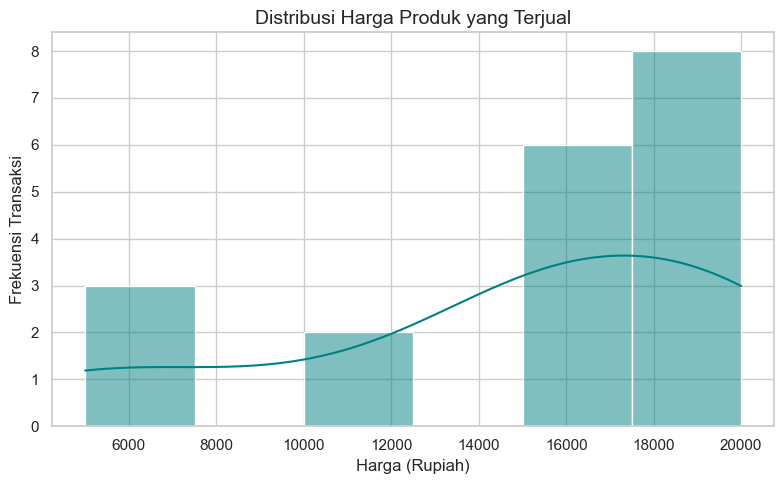

In [23]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(data=df_all, x='harga', kde=True, color='teal')

plt.title("Distribusi Harga Produk yang Terjual", fontsize=14)
plt.xlabel("Harga (Rupiah)")
plt.ylabel("Frekuensi Transaksi")
plt.tight_layout()
plt.show()


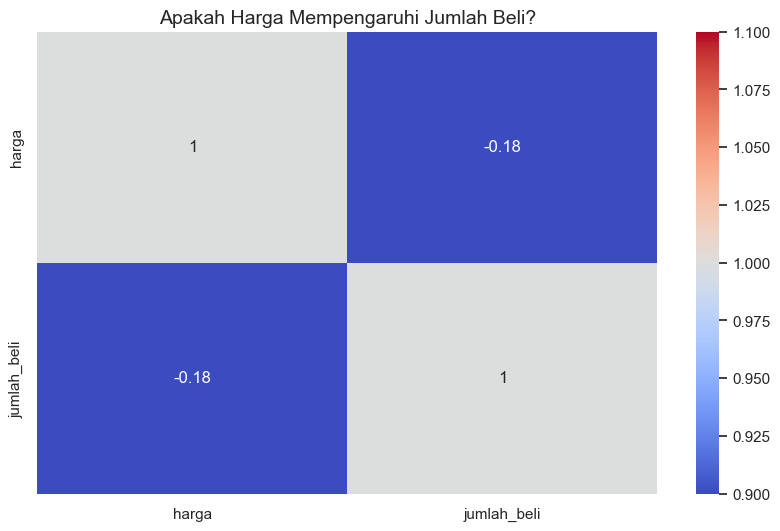

In [27]:
korelasi = df_all[['harga', 'jumlah_beli']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title("Apakah Harga Mempengaruhi Jumlah Beli?", fontsize=14)
plt.show()


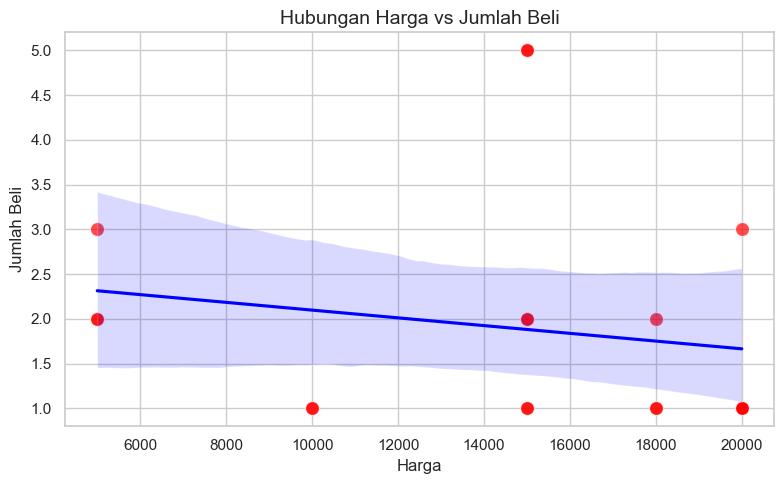

In [31]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df_all, x="harga", y="jumlah_beli", s=100, color="red", alpha=0.7)
sns.regplot(data=df_all, x='harga', y='jumlah_beli', scatter=False, color='blue')

plt.title("Hubungan Harga vs Jumlah Beli", fontsize=14)
plt.xlabel("Harga")
plt.ylabel("Jumlah Beli")
plt.tight_layout()
plt.show()

In [24]:
df_transaction

,id_transaksi,tanggal,product_id,jumlah_beli
0,1,2025-01-01,101,2.0
1,2,2025-01-02,102,1.0
2,3,2025-01-03,101,5.0
3,4,2025-01-03,105,2.0
4,5,2025-01-01,103,1.0
5,6,2025-01-02,101,NaN
6,7,2025-01-02,104,1.0
7,8,2025-01-01,102,3.0
8,9,2025-01-03,101,1.0
9,10,2025-01-02,999,10.0


In [25]:
df_transaction

,id_transaksi,tanggal,product_id,jumlah_beli
0,1,2025-01-01,101,2.0
1,2,2025-01-02,102,1.0
2,3,2025-01-03,101,5.0
3,4,2025-01-03,105,2.0
4,5,2025-01-01,103,1.0
5,6,2025-01-02,101,NaN
6,7,2025-01-02,104,1.0
7,8,2025-01-01,102,3.0
8,9,2025-01-03,101,1.0
9,10,2025-01-02,999,10.0
